In [1]:
from torchvision import datasets
import numpy as np
import torch

#train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True)
#test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True)

In [2]:
print(torch.version.cuda)
torch.cuda.is_available()

12.4


True

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_val_dataset, test_dataset
class_names = train_val_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Text(0.5, 1.0, '3 - three')

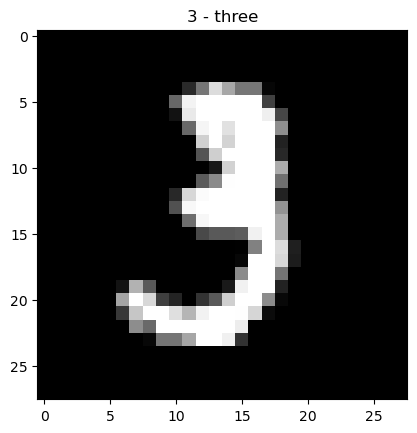

In [5]:
img, label = train_val_dataset[10]
img, label
plt.imshow(img, cmap='gray')
plt.title(f"{class_names[label]}")

In [2]:
from torchvision import transforms

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets", train=False, download=False, transform=transforms.ToTensor())
mnist_transforms = transforms.Compose([transforms.ToTensor()])

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=False, transform=mnist_transforms)
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [3]:
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
len(train_dataset), len(val_dataset), len(test_dataset)

(54000, 6000, 10000)

In [4]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Let's see no of batches that we have now with the current batch-size
len(train_dataloader), len(val_dataloader), len(test_dataloader) 

(1688, 188, 313)

In [16]:
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from vit_pytorch import ViT  # ViT model
import os
from torchmetrics import Accuracy


# Experiment tracking setup
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "VisionTransformer_v2"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

# Device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define Vision Transformer (ViT) model v1
# model_vit = ViT(
#     image_size=28,       # MNIST images are 28x28
#     patch_size=4,        # 4 patches per dimension (28/7)
#     num_classes=10,      # 10 output classes for digits 0-9
#     dim=64,             # Embedding dimension
#     depth=6,             # Number of transformer layers
#     heads=8,             # Number of attention heads
#     mlp_dim=128,         # Hidden dimension in MLP layers
#     dropout=0.1,         # Dropout rate in transformer
#     emb_dropout=0.1,     # Dropout rate for embeddings
#     channels = 1
# ).to(device)

### V2

model_vit = ViT(
    image_size=28,       # MNIST images are 28x28
    patch_size=7,        # 4 patches per dimension (28/7)
    num_classes=10,      # 10 output classes for digits 0-9
    dim=64,             # Embedding dimension
    depth=6,             # Number of transformer layers
    heads=8,             # Number of attention heads
    mlp_dim=128,         # Hidden dimension in MLP layers
    dropout=0.1,         # Dropout rate in transformer
    emb_dropout=0.1,     # Dropout rate for embeddings
    channels = 1
).to(device)

#### Vanilla Model
# model_vit = ViT(
#     image_size=28,       # MNIST images are 28x28
#     patch_size=4,        # 4 patches per dimension (28/7)
#     num_classes=10,      # 10 output classes for digits 0-9
#     dim=64,             # Embedding dimension
#     depth=4,             # Number of transformer layers
#     heads=2,             # Number of attention heads
#     mlp_dim=64,         # Hidden dimension in MLP layers
#     dropout=0.1,         # Dropout rate in transformer
#     emb_dropout=0.1,     # Dropout rate for embeddings
#     channels = 1
# ).to(device)



# Initialize optimizer and loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_vit.parameters(), lr=1e-4)
#optimizer = optim.SGD(model_vit.parameters(),momentum=0.9,lr=0.01)

print(model_vit.parameters)


# accuracy = Accuracy(task='multiclass', num_classes=10).to(device)
# # Training and Validation Loops
# EPOCHS = 10
# for epoch in tqdm(range(EPOCHS)):
#     # Training Loop
#     train_loss, train_acc = 0.0, 0.0
#     model_vit.train()
#     for X, y in train_dataloader:
#         X, y = X.to(device), y.to(device)
#        # print(X.shape)
#         optimizer.zero_grad()
        
#         # Forward pass
#         y_pred = model_vit(X)
#         loss = loss_fn(y_pred, y)
#         train_loss += loss.item()
#         train_acc += accuracy(y_pred, y)
        
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#     # Average metrics
#     train_loss /= len(train_dataloader)
#     train_acc /= len(train_dataloader)

#     # Validation Loop
#     val_loss, val_acc = 0.0, 0.0
#     model_vit.eval()
#     with torch.no_grad():
#         for X, y in val_dataloader:
#             X, y = X.to(device), y.to(device)
            
#             # Forward pass
#             y_pred = model_vit(X)
#             loss = loss_fn(y_pred, y)
#             val_loss += loss.item()
#             val_acc += accuracy(y_pred, y)

#     # Average metrics
#     val_loss /= len(val_dataloader)
#     val_acc /= len(val_dataloader)

#     # Log metrics to TensorBoard
#     writer.add_scalars(main_tag="Loss", tag_scalar_dict={"train/loss": train_loss, "val/loss": val_loss}, global_step=epoch)
#     writer.add_scalars(main_tag="Accuracy", tag_scalar_dict={"train/acc": train_acc, "val/acc": val_acc}, global_step=epoch)

#     # Print progress
#     print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.5f} | Val Loss: {val_loss:.5f} | Val Accuracy: {val_acc:.5f}")


<bound method Module.parameters of ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=7, p2=7)
    (1): LayerNorm((49,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=49, out_features=64, bias=True)
    (3): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=64, out_features=1536, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=512, out_features=64, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(
          (net): S

In [9]:
from torch import nn

class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14
            
            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self, x):
        return self.classifier(self.feature(x))

#### Only run when training new model

In [17]:
# Initialize optimizer and loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_vit.parameters(), lr=1e-4)

print(model_vit.parameters)


accuracy = Accuracy(task='multiclass', num_classes=10).to(device)
# Training and Validation Loops
EPOCHS = 15
for epoch in tqdm(range(EPOCHS)):
    # Training Loop
    train_loss, train_acc = 0.0, 0.0
    model_vit.train()
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
       # print(X.shape)
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model_vit(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy(y_pred, y)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Average metrics
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Validation Loop
    val_loss, val_acc = 0.0, 0.0
    model_vit.eval()
    with torch.no_grad():
        for X, y in val_dataloader:
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            y_pred = model_vit(X)
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()
            val_acc += accuracy(y_pred, y)

    # Average metrics
    val_loss /= len(val_dataloader)
    val_acc /= len(val_dataloader)

    # Log metrics to TensorBoard
    writer.add_scalars(main_tag="Loss", tag_scalar_dict={"train/loss": train_loss, "val/loss": val_loss}, global_step=epoch)
    writer.add_scalars(main_tag="Accuracy", tag_scalar_dict={"train/acc": train_acc, "val/acc": val_acc}, global_step=epoch)

    # Print progress
    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.5f} | Val Loss: {val_loss:.5f} | Val Accuracy: {val_acc:.5f}")

<bound method Module.parameters of ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=7, p2=7)
    (1): LayerNorm((49,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=49, out_features=64, bias=True)
    (3): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=64, out_features=1536, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=512, out_features=64, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(
          (net): S

  7%|▋         | 1/15 [00:18<04:25, 18.95s/it]

Epoch: 1 | Train Loss: 0.60971 | Train Accuracy: 0.82431 | Val Loss: 0.19000 | Val Accuracy: 0.94531


 13%|█▎        | 2/15 [00:37<04:03, 18.70s/it]

Epoch: 2 | Train Loss: 0.20420 | Train Accuracy: 0.94039 | Val Loss: 0.12013 | Val Accuracy: 0.96376


 20%|██        | 3/15 [00:59<04:02, 20.19s/it]

Epoch: 3 | Train Loss: 0.14820 | Train Accuracy: 0.95601 | Val Loss: 0.10031 | Val Accuracy: 0.97124


 27%|██▋       | 4/15 [01:22<03:52, 21.15s/it]

Epoch: 4 | Train Loss: 0.12316 | Train Accuracy: 0.96275 | Val Loss: 0.08592 | Val Accuracy: 0.97457


 33%|███▎      | 5/15 [01:44<03:35, 21.59s/it]

Epoch: 5 | Train Loss: 0.10246 | Train Accuracy: 0.96829 | Val Loss: 0.07325 | Val Accuracy: 0.97922


 40%|████      | 6/15 [02:06<03:14, 21.66s/it]

Epoch: 6 | Train Loss: 0.09095 | Train Accuracy: 0.97199 | Val Loss: 0.07059 | Val Accuracy: 0.98005


 47%|████▋     | 7/15 [02:28<02:55, 21.98s/it]

Epoch: 7 | Train Loss: 0.08321 | Train Accuracy: 0.97371 | Val Loss: 0.06526 | Val Accuracy: 0.98172


 53%|█████▎    | 8/15 [02:50<02:32, 21.81s/it]

Epoch: 8 | Train Loss: 0.07368 | Train Accuracy: 0.97610 | Val Loss: 0.06309 | Val Accuracy: 0.98205


 60%|██████    | 9/15 [03:12<02:11, 21.92s/it]

Epoch: 9 | Train Loss: 0.06733 | Train Accuracy: 0.97804 | Val Loss: 0.06250 | Val Accuracy: 0.98188


 67%|██████▋   | 10/15 [03:31<01:45, 21.09s/it]

Epoch: 10 | Train Loss: 0.05966 | Train Accuracy: 0.98078 | Val Loss: 0.06245 | Val Accuracy: 0.98305


 73%|███████▎  | 11/15 [03:51<01:22, 20.56s/it]

Epoch: 11 | Train Loss: 0.05475 | Train Accuracy: 0.98239 | Val Loss: 0.06339 | Val Accuracy: 0.98305


 80%|████████  | 12/15 [04:10<01:00, 20.11s/it]

Epoch: 12 | Train Loss: 0.05313 | Train Accuracy: 0.98302 | Val Loss: 0.05432 | Val Accuracy: 0.98637


 87%|████████▋ | 13/15 [04:29<00:39, 19.78s/it]

Epoch: 13 | Train Loss: 0.04783 | Train Accuracy: 0.98473 | Val Loss: 0.05704 | Val Accuracy: 0.98421


 93%|█████████▎| 14/15 [04:48<00:19, 19.62s/it]

Epoch: 14 | Train Loss: 0.04239 | Train Accuracy: 0.98643 | Val Loss: 0.05648 | Val Accuracy: 0.98521


100%|██████████| 15/15 [05:07<00:00, 20.52s/it]

Epoch: 15 | Train Loss: 0.04080 | Train Accuracy: 0.98626 | Val Loss: 0.05554 | Val Accuracy: 0.98471


In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#MODEL_NAME = "ViT_vanilla_mnist.pth"
MODEL_NAME = "ViT_v2_mnist.pth"
#MODEL_NAME = "lenet5_v1_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Saving the model
#print(f"Saving the model: {MODEL_SAVE_PATH}")
#torch.save(obj=model_vit.state_dict(), f=MODEL_SAVE_PATH)

#Loading the saved model
# model_ViT_mnist_loaded = ViT(
#     image_size=28,       # MNIST images are 28x28
#     patch_size=4,        # 4 patches per dimension (28/7)
#     num_classes=10,      # 10 output classes for digits 0-9
#     dim=64,             # Embedding dimension
#     depth=4,             # Number of transformer layers
#     heads=2,             # Number of attention heads
#     mlp_dim=64,         # Hidden dimension in MLP layers
#     dropout=0.1,         # Dropout rate in transformer
#     emb_dropout=0.1,     # Dropout rate for embeddings
#     channels = 1
# ).to(device)

# model_ViT_mnist_loaded = ViT(
#     image_size=28,       # MNIST images are 28x28
#     patch_size=4,        # 4 patches per dimension (28/7)
#     num_classes=10,      # 10 output classes for digits 0-9
#     dim=64,             # Embedding dimension
#     depth=6,             # Number of transformer layers
#     heads=8,             # Number of attention heads
#     mlp_dim=128,         # Hidden dimension in MLP layers
#     dropout=0.1,         # Dropout rate in transformer
#     emb_dropout=0.1,     # Dropout rate for embeddings
#     channels = 1
# ).to(device)


#v2
model_ViT_mnist_loaded = ViT(
    image_size=28,       # MNIST images are 28x28
    patch_size=7,        # 4 patches per dimension (28/7)
    num_classes=10,      # 10 output classes for digits 0-9
    dim=64,             # Embedding dimension
    depth=6,             # Number of transformer layers
    heads=8,             # Number of attention heads
    mlp_dim=128,         # Hidden dimension in MLP layers
    dropout=0.1,         # Dropout rate in transformer
    emb_dropout=0.1,     # Dropout rate for embeddings
    channels = 1
).to(device)


model_ViT_mnist_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))



#model_lenet5_v1_mnist_loaded = LeNet5V1()
#model_lenet5_v1_mnist_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

C:\Users\Sven Jacob\AppData\Local\Temp\ipykernel_23708\4031630476.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ViT_mnist_loaded.load_state_dict(torch.load(MODE

<All keys matched successfully>

In [19]:
sum(p.numel() for p in model_ViT_mnist_loaded.parameters())

893164

In [20]:
from torchmetrics import Accuracy


device = 'cuda' if torch.cuda.is_available() else 'cpu'

loss_fn = nn.CrossEntropyLoss()
accuracy = Accuracy(task='multiclass', num_classes=10).to(device)

test_loss, test_acc = 0, 0

model_loaded = model_ViT_mnist_loaded.to(device)
#model_loaded = model_lenet5_v1_mnist_loaded.to(device)

#model_ViT_mnist_loaded.eval()
model_loaded.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        #y_pred = model_ViT_mnist_loaded(X)
        y_pred = model_loaded(X)
        
        test_loss += loss_fn(y_pred, y)
        test_acc += accuracy(y_pred, y)
        
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(f"Test loss: {test_loss: .5f}| Test acc: {test_acc: .5f}")

Test loss:  0.06248| Test acc:  0.98103


In [24]:
device

'cuda'

In [21]:
from captum.attr import IntegratedGradients, GradientShap, DeepLift
from tqdm import tqdm

ig = IntegratedGradients(model_loaded)
gs = GradientShap(model_loaded)
dl = DeepLift(model_loaded)
#sample ,label = test_dataset[10]

#tensor_1 = torch.mean(torch.stack(data_c1),axis=0)
#tensor_2 = torch.mean(torch.stack(data_c2),axis=0)

all_attributions_ig = []
all_labels = []
all_attributions_gs = []
all_attributions_ks = []
all_attributions_dl = []
all_batches= []
model_loaded.eval()
for batch_samples, batch_labels in tqdm(test_dataloader):
    #print(1)
    # Ensure samples have the correct shape
    batch_labels = batch_labels.to(device)
    batch_samples = batch_samples.requires_grad_().to(device) # Enable gradients for attribution
    baseline_dist = torch.zeros((batch_samples.shape[0],1,28,28)).to(device)
    #print(baseline_dist.shape)
    #baseline_dist = torch.abs(torch.tensor(Contributions[0],dtype=torch.float32).repeat(batch_samples.shape[0],1))

    # Calculate the attributions for each sample in the batch
    # We use target=0 as we are working with a binary classification output
    attributions, deltas = ig.attribute(batch_samples, target=batch_labels, return_convergence_delta=True)

    
    # Append attributions and labels for further analysis
    all_attributions_ig.append(attributions)
    all_labels.append(batch_labels)
    all_batches.append(batch_samples.detach())
    #batch_samples = batch_samples.requires_grad_().to(device)
    attributions_gs, deltas = gs.attribute(batch_samples, target=batch_labels,  baselines=baseline_dist,return_convergence_delta=True)
    all_attributions_gs.append(attributions_gs)
    
    #batch_samples = batch_samples.requires_grad_().to(device)
    #attributions_dl = dl.attribute(batch_samples, target=batch_labels)
    attributions_dl = dl.attribute(batch_samples, target=batch_labels)
    all_attributions_dl.append(attributions_dl)


# Concatenate all attributions and labels
all_attributions_ig = torch.cat(all_attributions_ig, dim=0)  # Shape: [num_samples, num_features]
all_labels = torch.cat(all_labels, dim=0)

all_attributions_gs = torch.cat(all_attributions_gs, dim=0)
all_attributions_dl = torch.cat(all_attributions_dl, dim=0)

all_batches = torch.cat(all_batches,dim=0)

  0%|          | 0/313 [00:00<?, ?it/s]c:\Users\Sven Jacob\miniconda3\envs\torch\Lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|██████████| 313/313 [00:43<00:00,  7.17it/s]


In [28]:
all_attributions_dl_old = torch.load('DL_Attributions.pt')

C:\Users\jsve\AppData\Local\Temp\ipykernel_1440\3700276918.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_attributions_dl_old = torch.load('DL_Attributions.pt')


In [32]:
import io

torch.save(all_attributions_dl.detach().cpu().numpy(),"DL_Attributions_v1.pt")
buffer = io.BytesIO()
torch.save(all_attributions_dl, buffer)

torch.save(all_attributions_gs.detach().cpu().numpy(),"GS_Attributions_v1.pt")
buffer = io.BytesIO()
torch.save(all_attributions_gs, buffer)

torch.save(all_attributions_ig.detach().cpu().numpy(),"IG_Attributions_v1.pt")
buffer = io.BytesIO()
torch.save(all_attributions_ig, buffer)

In [44]:
all_batches = torch.cat(all_batches,dim=0)

In [35]:
from utils import *


# c1=8
# c2=9

# c1 = 7
# c2 = 1


#c1 = 5
#c2 = 6
c1 = 5
c2 = 6

# all_labels = []
# all_batches = []
# for batch_samples,batch_labels in test_dataloader:
#     all_labels.append(batch_labels)
#     all_batches.append(batch_samples)

# all_batches = torch.cat(all_batches,dim=0)
# all_labels = torch.cat(all_labels,dim=0)


all_labels == c1

ig_plot = torch.abs(all_attributions_ig[all_labels ==c1 ].mean(axis=0)-all_attributions_ig[all_labels ==c2 ].mean(axis=0)).cpu().detach().numpy()
dl_plot = torch.abs(all_attributions_dl[all_labels ==c1 ].mean(axis=0)-all_attributions_dl[all_labels ==c2 ].mean(axis=0)).cpu().detach().numpy()
gs_plot = torch.abs(all_attributions_gs[all_labels ==c1 ].mean(axis=0)-all_attributions_gs[all_labels ==c2 ].mean(axis=0)).cpu().detach().numpy()

data_X = all_batches[all_labels==c1].mean(axis=0)[0,:,:]
data_Y = all_batches[all_labels==c2].mean(axis=0)[0,:,:]

rf, betas, swd = remove_important_features(data_X.cpu().detach().numpy().reshape(1,784),data_Y.cpu().detach().numpy().reshape(1,784),100,1000)

In [50]:
all_attributions_dl_old = torch.Tensor(all_attributions_dl_old).to(device)

In [11]:
def filter_explanations(C1,C2,all_attributions_ig,all_attributions_dl,all_attributions_gs,all_labels):
    data={'X':[],'Y':[],'Features':[],'IG':[],'GS':[],'DL':[]}
    for c1,c2 in zip(C1,C2):
        data['IG'].append(torch.abs(all_attributions_ig[all_labels ==c1 ].mean(axis=0)-all_attributions_ig[all_labels ==c2 ].mean(axis=0)).cpu().detach().numpy())
        data['DL'].append(torch.abs(all_attributions_dl[all_labels ==c1 ].mean(axis=0)-all_attributions_dl[all_labels ==c2 ].mean(axis=0)).cpu().detach().numpy())
        data['GS'].append(torch.abs(all_attributions_gs[all_labels ==c1 ].mean(axis=0)-all_attributions_gs[all_labels ==c2 ].mean(axis=0)).cpu().detach().numpy())

        data_X = all_batches[all_labels==c1].mean(axis=0)[0,:,:]
        data_Y = all_batches[all_labels==c2].mean(axis=0)[0,:,:]

        data['X'].append(data_X)
        data['Y'].append(data_Y)

        rf, _, _ = remove_important_features(data_X.cpu().detach().numpy().reshape(1,784),data_Y.cpu().detach().numpy().reshape(1,784),250,1000)

        Features = np.zeros(784)
        f_id = []
        contributions = []
        k=1
        for d in rf:
            i = d["removed_feature"]
            Features[i] = 1/(np.log(k+1)**2)
            k+=0.075
            f_id.append(i)
            contributions.append(d['contribution_value'])
        data['Features'].append(Features)

    return data


def plot_MNIST_explanations(n_rows,n_cols,data):
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(12,6))
    
    for i in range(n_rows):
        data_X = data['X'][i]
        data_Y = data['Y'][i]
        Features = data['Features'][i]
        ig_plot = data['IG'][i]
        gs_plot = data['GS'][i]
        dl_plot = data['DL'][i]
        ###first row set titles
        if i==0:
            ax[i,0].set_title('Before Drift',fontsize=17)
            ax[i,1].set_title('After Drift',fontsize=17)
            ax[i,2].set_title('SWD',fontsize=17)
            ax[i,3].set_title('IG',fontsize=17)
            ax[i,4].set_title('Grad SHAP',fontsize=17)
            ax[i,5].set_title('DeepLift',fontsize=17)

        ax[i,0].imshow(data_X.cpu().numpy(),cmap='gray')
        ax[i,0].set_xticks([])
        ax[i,0].set_yticks([])
        ax[i,1].imshow(data_Y.cpu().numpy(),cmap='gray')
        ax[i,1].set_xticks([])
        ax[i,1].set_yticks([])
        ax[i,2].imshow(np.float64(Features.reshape(28,28)),cmap='plasma')
        ax[i,2].set_xticks([])
        ax[i,2].set_yticks([])
        ax[i,3].imshow(ig_plot[0,:,:],cmap='plasma')
        ax[i,3].set_xticks([])
        ax[i,3].set_yticks([])
        ax[i,4].imshow(gs_plot[0,:,:], cmap='plasma')
        ax[i,4].set_xticks([])
        ax[i,4].set_yticks([])
        ax[i,5].imshow(dl_plot[0,:,:], cmap='plasma')
        ax[i,5].set_xticks([])
        ax[i,5].set_yticks([])
    
    # for axes in ax:
    #     axes.set_xticks([])
    #     axes.set_yticks([])

    fig.tight_layout()

    return fig




        

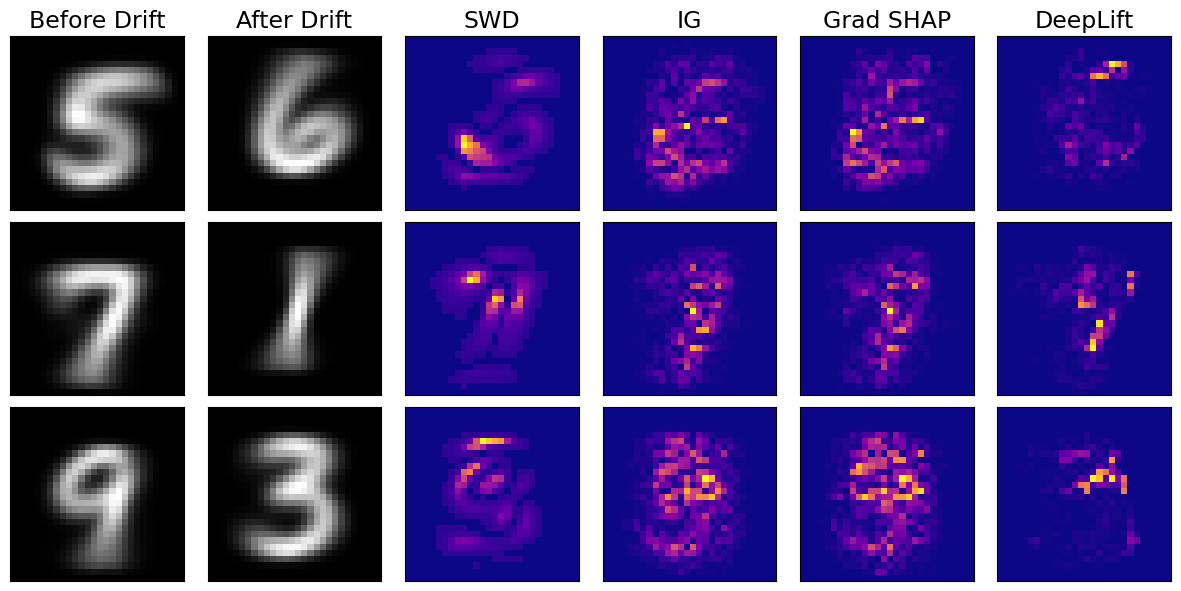

In [22]:
from utils import *
import matplotlib.pyplot as plt
data = filter_explanations([5,7,9],[6,1,3],all_attributions_ig,all_attributions_dl,all_attributions_gs,all_labels)
fig = plot_MNIST_explanations(3,6,data)

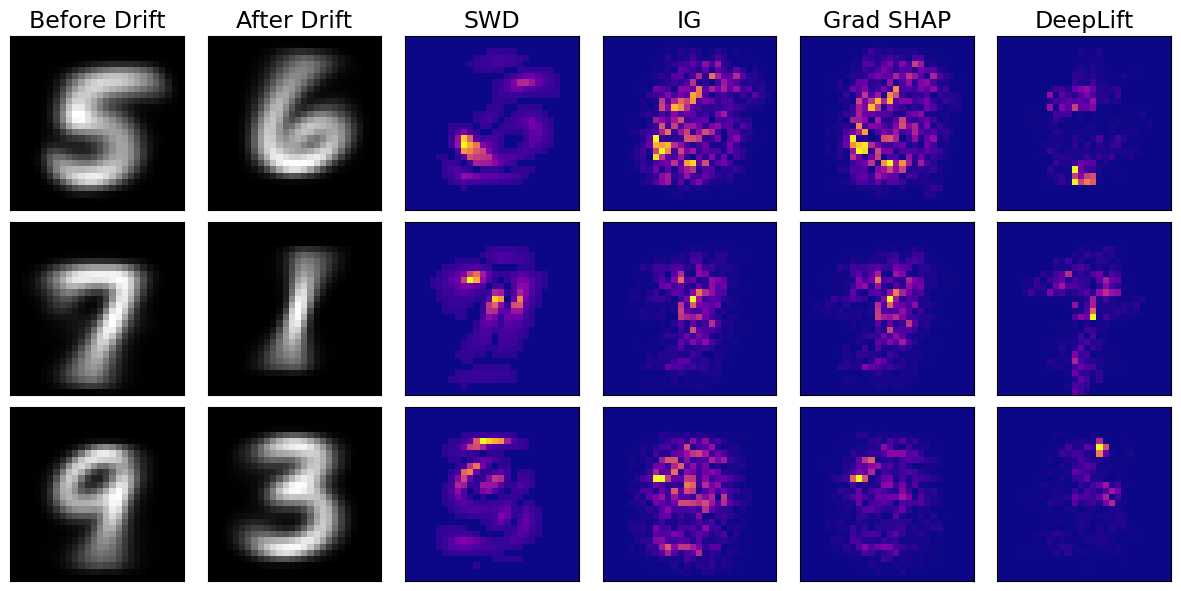

In [14]:
from utils import *
import matplotlib.pyplot as plt
data = filter_explanations([5,7,9],[6,1,3],all_attributions_ig,all_attributions_dl,all_attributions_gs,all_labels)
fig = plot_MNIST_explanations(3,6,data)

In [45]:
fig.savefig('MNIST_LENET5_plot.pdf')

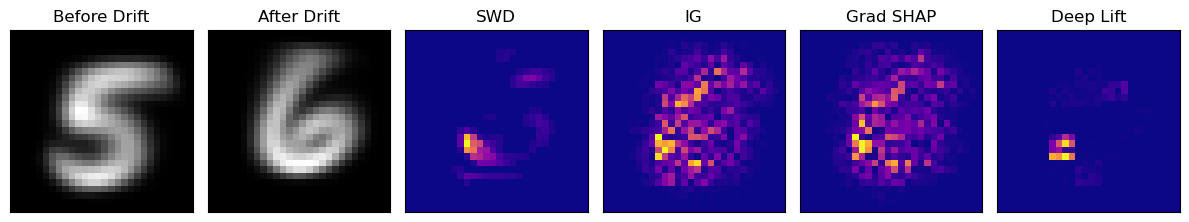

In [54]:
replace_negatives = np.vectorize(lambda x: 0 if x < 0 else x)

Features = np.zeros(784)
f_id = []
contributions = []
k=1
for d in rf:
    i = d["removed_feature"]
    #Features[i] = 1/(1+k**(1/2))
    Features[i] = 1/(np.log(k+1)**3)
    k+=0.075
    f_id.append(i)
    contributions.append(d['contribution_value'])


fig,ax = plt.subplots(1,6,figsize=(12,4))
ax[0].set_title('Before Drift')
ax[0].imshow(data_X.cpu().numpy(), cmap='gray')
ax[1].set_title('After Drift')
ax[1].imshow(data_Y.cpu().numpy(), cmap='gray')
#ax[0].imshow(X_img,cmap=plt.cm.gray)
#ax[1].imshow(Y_img,cmap=plt.cm.gray)
ax[2].set_title('SWD')
ax[2].imshow(np.float64(Features.reshape(28,28)),cmap='plasma')
ax[3].imshow(ig_plot[0,:,:],cmap='plasma')
#ax[3].imshow(np.abs(attr1[0][0].detach().to('cpu').numpy()-attr2[0][0].detach().to('cpu').numpy()),cmap='plasma')
ax[3].set_title('IG')
#ax[4].imshow(replace_negatives(attr1_GS[0][0].detach().to('cpu').numpy()+attr2_GS[0][0].detach().to('cpu').numpy()),cmap='plasma')
#ax[4].imshow(np.abs(attr1_GS[0][0].detach().to('cpu').numpy()-attr2_GS[0][0].detach().to('cpu').numpy()),cmap='plasma')
ax[4].imshow(gs_plot[0,:,:],cmap='plasma')
ax[4].set_title('Grad SHAP')

ax[5].imshow(dl_plot[0,:,:],cmap='plasma')
#ax[5].imshow(replace_negatives())
#ax[5].imshow(np.abs(attr1_DL[0][0].detach().to('cpu').numpy())+np.abs(attr2_DL[0][0].detach().to('cpu').numpy()),cmap='plasma')

#ax[5].imshow(np.abs(attr1_DL[0][0].detach().to('cpu').numpy()-attr2_DL[0][0].detach().to('cpu').numpy()),cmap='plasma')
ax[5].set_title('Deep Lift')


for axes in ax:
    axes.set_xticks([])
    axes.set_yticks([])
#ax[5].imshow(np.abs(Features.reshape(28,28)-(attr2_GS[0][0].detach().to('cpu').numpy()+attr1_GS[0][0].detach().to('cpu').numpy())),cmap='plasma')
fig.tight_layout()

In [57]:
fig.savefig('MNIST_example0-8.pdf')